# Support Vector Machine Video Classifier

This notebook uses Support Vector Machine to predict a Youtube category based off of 
the title. We will run this on three inputs. Filtered titles, filtered and normalized titles, and
filtered titles with no stop words

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import matplotlib.pyplot as plt
import seaborn as sns

### Load data and get Data

Here, we want to load the csv file and separate each column. 

In [2]:
df_titles_info = pd.read_csv('./output/US_count_vectorizer_dataset.csv')
df_titles_info.head()

,title,filter_title,filter_title_no_stops,category_id
0,WE WANT TO TALK ABOUT OUR MARRIAGE,we want to talk about our marriage,want talk marriage,People & Blogs
1,The Trump Presidency: Last Week Tonight with J...,the trump presidency last week tonight with jo...,trump presidency last week tonight john oliver...,Entertainment
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman rudy mancuso king bach lele pons,racist superman rudy mancuso king bach lele pons,Comedy
3,Nickelback Lyrics: Real or Fake?,nickelback lyrics real or fake,nickelback lyrics real fake,Entertainment
4,I Dare You: GOING BALD!?,i dare you going bald,dare going bald,Entertainment


### Feature Selection

1. df_x are regular, filtered titles
2. df_x2 are filtered titles that does not contain stop words
3. df_y are video categories
4. target_names are all the possible categories

In [3]:
df_x = df_titles_info['filter_title']
df_x2 = df_titles_info['filter_title_no_stops']
df_y = df_titles_info['category_id']
target_names = list(df_titles_info['category_id'].unique())

### Split the data

We want to split the data here where 80 percent are reserved for training and 20 percent is reserved for testing

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_x2, df_y, test_size=0.2)

Make sure training and testing data don't contain null values before tokenizing

In [5]:
# replace NaN with spaces so count vectorizer can work
x_train2 = x_train2.fillna('')
x_test2 = x_test2.fillna('')

In [6]:
if x_train.isna().sum() != 0:
    print("x_train has null values")
elif x_test.isna().sum() != 0:
    print("x_test has null values")
elif y_train.isna().sum() != 0:
    print("y_train has null values")
elif y_test.isna().sum() != 0:
    print("y_test has null values")
elif x_train2.isna().sum() != 0:
    print("x_train2 has null values")
elif x_test2.isna().sum() != 0:
    print("x_test2 has null values")
elif y_train2.isna().sum() != 0:
    print("y_train2 has null values")
elif y_test2.isna().sum() != 0:
    print("y_test2 has null values")
else:
    print("Good to go!")

Good to go!


### Tokenize training video titles using CountVectorizer

Here, we want to convert our video titles into a frequency matrix of individual vocabularies
so the SVM model can recognize it

In [7]:
count_vectorizer = CountVectorizer()
train_count_vector = count_vectorizer.fit_transform(x_train)
test_count_vector = count_vectorizer.transform(x_test)

In [8]:
print(train_count_vector.shape)
print(train_count_vector.toarray())

(32759, 10576)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


___

In [9]:
count_vectorizer_2 = CountVectorizer()
train_count_vector_2 = count_vectorizer_2.fit_transform(x_train2)
test_count_vector_2 = count_vectorizer_2.transform(x_test2)

In [10]:
print(train_count_vector_2.toarray())
print(train_count_vector_2.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(32759, 10518)


### Normalize title frequencies using TF-IDF

In [11]:
tfidf_transformer = TfidfTransformer()
x_trained_tfidf_vector = tfidf_transformer.fit_transform(train_count_vector)
x_test_tfidf_vector = tfidf_transformer.transform(test_count_vector)

In [12]:
print(x_trained_tfidf_vector.shape)
print(x_trained_tfidf_vector.toarray())

(32759, 10576)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


---

In [13]:
tfidf_transformer_2 = TfidfTransformer()
x_trained_tfidf_vector_2 = tfidf_transformer_2.fit_transform(train_count_vector_2)
x_test_tfidf_vector_2 = tfidf_transformer_2.transform(test_count_vector_2)

In [14]:
print(x_trained_tfidf_vector_2.shape)
print(x_trained_tfidf_vector_2.toarray())

(32759, 10518)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.53565097 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### Train SVM Model and assess prediction accuracy using different input

1. Here we want to use our previously split training data to train the SVM model.
2. Afterwards, we will feed it our testing test and print out an accuracy report.

### Using titles with stop words

In [15]:
svm_count = SVC(kernel='linear').fit(train_count_vector, y_train)
svm_pred_count = svm_count.predict(test_count_vector)

count_accuracy_stop = accuracy_score(y_test, svm_pred_count)
print("Accuracy: ", count_accuracy_stop)
print(metrics.classification_report(y_test, svm_pred_count, target_names=target_names))

Accuracy:  0.9864468864468865
                       precision    recall  f1-score   support

       People & Blogs       1.00      0.99      0.99        76
        Entertainment       0.97      0.98      0.97       691
               Comedy       0.98      1.00      0.99       316
 Science & Technology       0.98      0.99      0.98      2003
     Film & Animation       0.98      0.99      0.98       463
      News & Politics       1.00      1.00      1.00       153
               Sports       0.99      0.99      0.99       818
                Music       0.99      0.99      0.99      1303
       Pets & Animals       0.99      0.97      0.98       542
            Education       1.00      1.00      1.00        14
        Howto & Style       0.98      0.98      0.98       646
     Autos & Vehicles       0.98      0.99      0.99       149
      Travel & Events       0.99      0.98      0.99       445
               Gaming       1.00      1.00      1.00        13
Nonprofits & Activism   

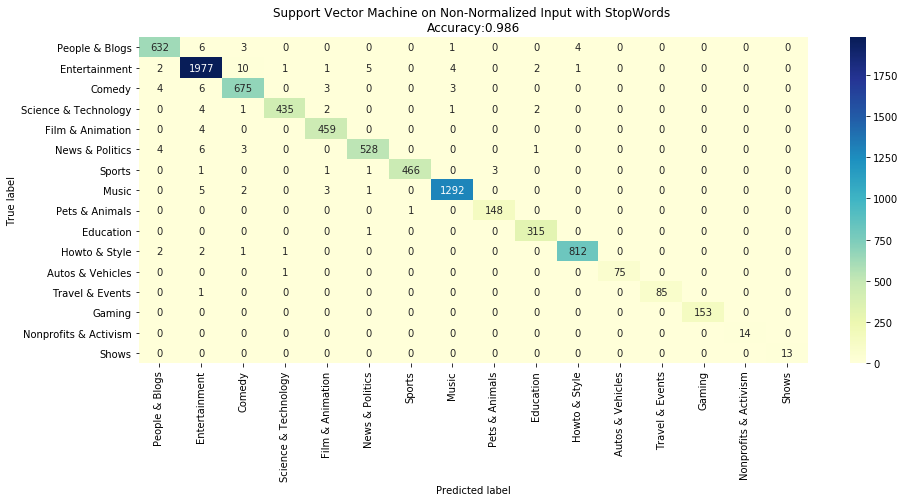

In [16]:
conf_matrix = confusion_matrix(y_test, svm_pred_count, labels=target_names)
conf_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)

plt.figure(figsize=(15,6))
sns.heatmap(conf_df, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Support Vector Machine on Non-Normalized Input with StopWords \nAccuracy:{0:.3f}'.format(count_accuracy_stop))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
svm_tfidf = SVC(kernel='linear').fit(x_trained_tfidf_vector, y_train)
svm_pred_tfidf = svm_tfidf.predict(x_test_tfidf_vector)

tfidf_accuracy_stop = accuracy_score(y_test, svm_pred_tfidf)
print("Accuracy: ", tfidf_accuracy_stop)
print(metrics.classification_report(y_test, svm_pred_tfidf, target_names=target_names))

Accuracy:  0.978021978021978
                       precision    recall  f1-score   support

       People & Blogs       1.00      0.97      0.99        76
        Entertainment       0.98      0.96      0.97       691
               Comedy       0.97      1.00      0.98       316
 Science & Technology       0.96      0.98      0.97      2003
     Film & Animation       0.99      0.97      0.98       463
      News & Politics       1.00      0.99      1.00       153
               Sports       0.99      0.99      0.99       818
                Music       0.99      0.98      0.98      1303
       Pets & Animals       0.97      0.97      0.97       542
            Education       1.00      1.00      1.00        14
        Howto & Style       0.98      0.96      0.97       646
     Autos & Vehicles       0.98      0.99      0.98       149
      Travel & Events       0.99      0.97      0.98       445
               Gaming       1.00      1.00      1.00        13
Nonprofits & Activism    

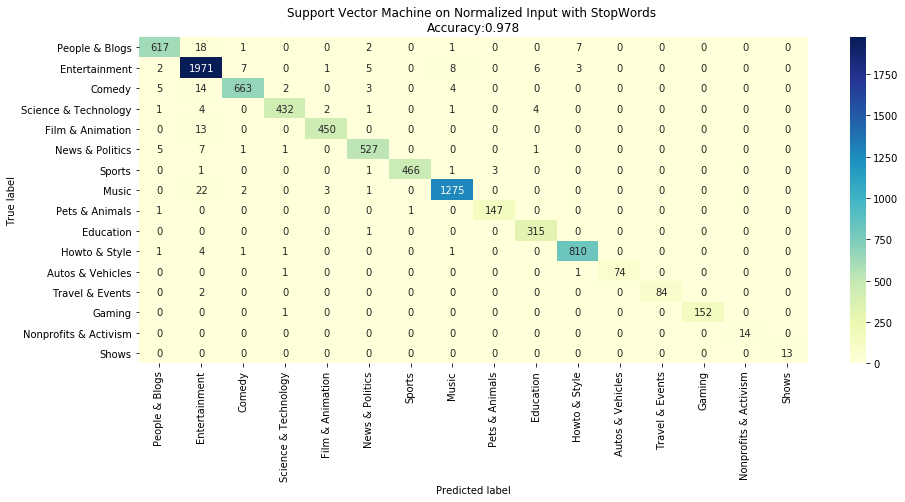

In [18]:
conf_matrix = confusion_matrix(y_test, svm_pred_tfidf, labels=target_names)
conf_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)

plt.figure(figsize=(15,6))
sns.heatmap(conf_df, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Support Vector Machine on Normalized Input with StopWords \nAccuracy:{0:.3f}'.format(tfidf_accuracy_stop))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Using titles without stop words

In [19]:
svm_count_2 = SVC(kernel='linear').fit(train_count_vector_2, y_train2)
svm_pred_count_2 = svm_count_2.predict(test_count_vector_2)

count_accuracy_non_stop = accuracy_score(y_test2, svm_pred_count_2)
print("Accuracy: ", count_accuracy_non_stop)
print(metrics.classification_report(y_test2, svm_pred_count_2, target_names=target_names))

Accuracy:  0.9848595848595849
                       precision    recall  f1-score   support

       People & Blogs       0.99      0.95      0.97        84
        Entertainment       0.96      0.97      0.97       698
               Comedy       0.98      1.00      0.99       339
 Science & Technology       0.98      0.99      0.98      1946
     Film & Animation       0.99      0.99      0.99       470
      News & Politics       0.99      1.00      1.00       168
               Sports       1.00      0.99      0.99       840
                Music       0.99      0.99      0.99      1292
       Pets & Animals       0.99      0.96      0.98       452
            Education       1.00      0.56      0.71         9
        Howto & Style       0.98      0.97      0.98       644
     Autos & Vehicles       0.99      1.00      0.99       203
      Travel & Events       0.99      0.99      0.99       491
               Gaming       1.00      1.00      1.00        13
Nonprofits & Activism   

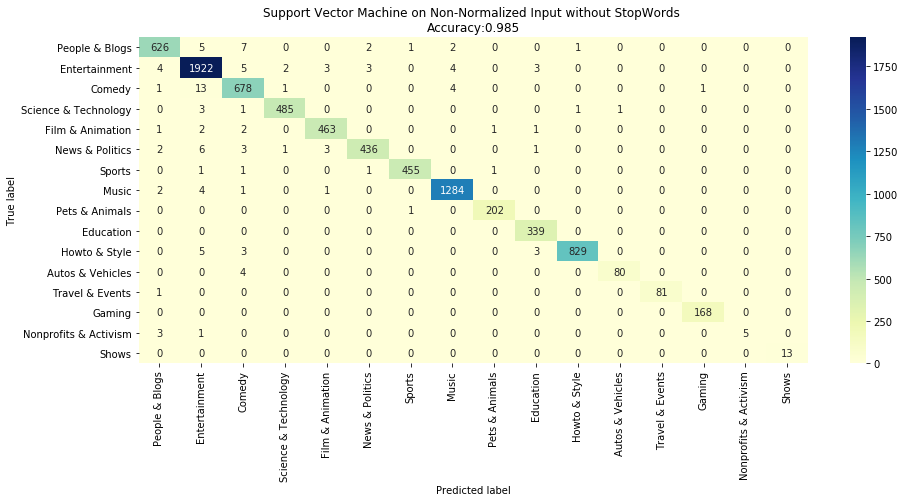

In [20]:
conf_matrix = confusion_matrix(y_test2, svm_pred_count_2, labels=target_names)
conf_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)

plt.figure(figsize=(15,6))
sns.heatmap(conf_df, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Support Vector Machine on Non-Normalized Input without StopWords \nAccuracy:{0:.3f}'.format(count_accuracy_non_stop))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
svm_tfidf_2 = SVC(kernel='linear').fit(x_trained_tfidf_vector_2, y_train2)
svm_pred_tfidf_2 = svm_tfidf_2.predict(x_test_tfidf_vector_2)

tfidf_accuracy_non_stop = accuracy_score(y_test2, svm_pred_tfidf_2)
print("Accuracy: ", tfidf_accuracy_non_stop)
print(metrics.classification_report(y_test2, svm_pred_tfidf_2, target_names=target_names))

In [ ]:
conf_matrix = confusion_matrix(y_test2, svm_pred_tfidf_2, labels=target_names)
conf_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)

plt.figure(figsize=(15,6))
sns.heatmap(conf_df, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Support Vector Machine on Normalized Input without StopWords \nAccuracy:{0:.3f}'.format(tfidf_accuracy_non_stop))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Repeat multiple runs of re-partitioning to access model accuracy
Optionally run the above code multiple times to assess precision of the models. However, this is very computationally expensive! Proceed with patience!

tf_stop_words = np.array([])
tf_non_stop = np.array([])
tfidf_stop_words = np.array([])
tfidf_non_stop = np.array([])

for i in np.arange(10):
    x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)
    x_train2, x_test2, y_train2, y_test2 = train_test_split(df_x2, df_y, test_size=0.2)

    # replace NaN with spaces so count vectorizer can work
    x_train2 = x_train2.fillna('')
    x_test2 = x_test2.fillna('')

    if x_train.isna().sum() != 0:
        print("x_train has null values")
    elif x_test.isna().sum() != 0:
        print("x_test has null values")
    elif y_train.isna().sum() != 0:
        print("y_train has null values")
    elif y_test.isna().sum() != 0:
        print("y_test has null values")
    elif x_train2.isna().sum() != 0:
        print("x_train2 has null values")
    elif x_test2.isna().sum() != 0:
        print("x_test2 has null values")
    elif y_train2.isna().sum() != 0:
        print("y_train2 has null values")
    elif y_test2.isna().sum() != 0:
        print("y_test2 has null values")
    else:
        print("Good to go!")
    
    count_vectorizer = CountVectorizer()
    train_count_vector = count_vectorizer.fit_transform(x_train)
    test_count_vector = count_vectorizer.transform(x_test)

    count_vectorizer_2 = CountVectorizer()
    train_count_vector_2 = count_vectorizer_2.fit_transform(x_train2)
    test_count_vector_2 = count_vectorizer_2.transform(x_test2)
    
    tfidf_transformer = TfidfTransformer()
    x_trained_tfidf_vector = tfidf_transformer.fit_transform(train_count_vector)
    x_test_tfidf_vector = tfidf_transformer.transform(test_count_vector)
    
    tfidf_transformer_2 = TfidfTransformer()
    x_trained_tfidf_vector_2 = tfidf_transformer_2.fit_transform(train_count_vector_2)
    x_test_tfidf_vector_2 = tfidf_transformer_2.transform(test_count_vector_2)
    
    svm_count = SVC(kernel='linear').fit(train_count_vector, y_train)
    svm_pred_count = svm_count.predict(test_count_vector)
    tf_stop_words = np.append(tf_stop_words, accuracy_score(y_test, svm_pred_count))
    
    svm_tfidf = SVC(kernel='linear').fit(x_trained_tfidf_vector, y_train)
    svm_pred_tfidf = svm_tfidf.predict(x_test_tfidf_vector)
    tfidf_stop_words = np.append(tfidf_stop_words, accuracy_score(y_test, svm_pred_tfidf))
    
    svm_count_2 = SVC(kernel='linear').fit(train_count_vector_2, y_train2)
    svm_pred_count_2 = svm_count_2.predict(test_count_vector_2)
    tf_non_stop = np.append(tf_non_stop, accuracy_score(y_test2, svm_pred_count_2))
    
    svm_tfidf_2 = SVC(kernel='linear').fit(x_trained_tfidf_vector_2, y_train2)
    svm_pred_tfidf_2 = svm_tfidf_2.predict(x_test_tfidf_vector_2)
    tfidf_non_stop = np.append(tfidf_non_stop, accuracy_score(y_test2, svm_pred_tfidf_2))
    
pd.DataFrame(tf_stop_words=tf_stop_words, tfidf_stop_words=tfidf_stop_words, tf_non_stop=tf_non_stop, tfidf_non_stop=tfidf_non_stop).boxplot(column=['tf_stop_words','tfidf_stop_words','tf_non_stop','tfidf_non_stop'])

In [ ]:
result = pd.DataFrame().assign(count_accuracy_stop=[count_accuracy_stop], tfidf_accuracy_stop=[tfidf_accuracy_stop], count_accuracy_non_stop=[count_accuracy_non_stop], tfidf_accuracy_non_stop=[tfidf_accuracy_non_stop]).transpose()

In [ ]:
result.columns = ['Accuracy Score']

In [ ]:
result.sort_values("Accuracy Score").plot(kind='barh', figsize=(10,5))

### Analysis

Using linear SVM, the prediction accuracy of video category based on title is consistently high across all groups of given input, with little difference among the various groups. Interestingly, inputting the raw count matrix yields a slightly higher accuracy than inputting weighted score matrix with TF-IDF, implying the uniqueness of words in a title might not be important in predicting categories. Additionally, removing stop words from video titles slightly enhances the accuracy of the linear SVM model. This is expected because there is less noise with stopwords removed. The above code can be run multiple times to further access the precision of the model between runs. More investigation is required to identify sources for misclassification in the various categories.